In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
import scipy.optimize as opt

In [3]:
data1 = scio.loadmat("ex8data1.mat")
X = data1['X']
Xval = data1['Xval']
yval = data1['yval']

Text(0, 0.5, 'Throughput (mb/s)')

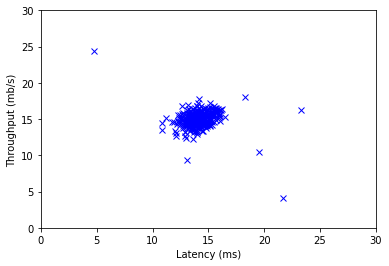

In [12]:
plt.plot(X[:,0], X[:,1], 'bx')
plt.axis([0, 30, 0, 30])
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

In [22]:
def estimateGaussian(X):
    m, n = X.shape
    mu = np.sum(X, axis = 0) / m
    sigma2 = np.sum(np.power(X - mu, 2), axis = 0) / m
    return mu, sigma2

In [23]:
mu, sigma2 = estimateGaussian(X)
print(mu)
print(sigma2)

[14.11222578 14.99771051]
[1.83263141 1.70974533]


In [51]:
def multivariateGaussian(X, mu, sigma2):
    if sigma2.ravel().shape[0] == sigma2.shape[0]:
        sigma2 = np.diag(sigma2)
    n = X.shape[1]
    s1 = np.dot(X - mu, np.linalg.inv(sigma2)) * (X - mu) /  -2
    s1 = np.sum(s1, axis = 1)
    p = np.exp(s1) / ((2 * np.pi) ** (n / 2) * np.linalg.det(sigma2) ** (1 / 2))
    return p

In [79]:
def visualizeFit(X, mu, sigma2):
    x = np.arange(0, 35, 0.5)
    X1, Y1 = np.meshgrid(x, x)
    m = X1.shape[0]
    Z = np.zeros((Y1.shape[0], X1.shape[1]))
    for i in range(X1.shape[1]):
        Z[:, i] = multivariateGaussian(np.hstack((X1[:,i].reshape(m,1), Y1[:,i].reshape(m,1))), mu, sigma2)
    plt.contour(X1, Y1, Z, np.logspace(-20, 0, 7))
    plt.plot(X[:,0], X[:,1], 'bx')
    plt.axis([0, 30, 0, 30])

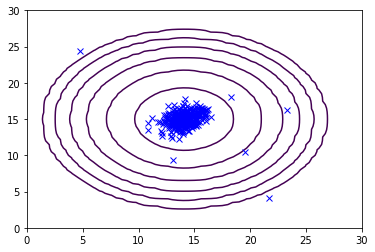

In [80]:
visualizeFit(X, mu, sigma2)

In [152]:
def selectThreshold(yval, pval):
    m = yval.shape[0]
    stepsize = (np.max(pval) - np.min(pval)) / 1000
    epsilon = np.arange(np.min(pval), np.max(pval), stepsize)
    bestEpsilon = 0
    bestF1 = 0
    for i in range(len(epsilon)):
        y = pval < epsilon[i]
        tp = np.sum((y == 1).reshape(m,1) & (yval == 1).reshape(m,1))
        fp = np.sum((y == 1).reshape(m,1) & (yval == 0).reshape(m,1))
        fn = np.sum((y == 0).reshape(m,1) & (yval == 1).reshape(m,1))
        precision = tp / (fp + tp)
        recall = tp / (tp + fn)
        F1 = 2 * precision * recall / (precision + recall)
        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = epsilon[i]
    return bestEpsilon, bestF1

In [130]:
pval = multivariateGaussian(Xval, mu, sigma2)
bestEpsilon, bestF1 = selectThreshold(yval, pval)
print(bestEpsilon)
print(bestF1)

8.990852779269496e-05
0.8750000000000001


d:\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


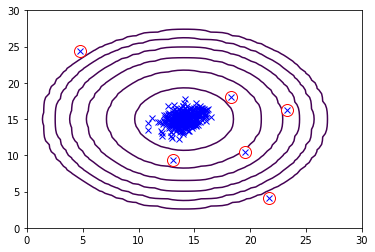

In [142]:
p = multivariateGaussian(X, mu, sigma2)
anomaly = np.where(p < bestEpsilon)
plt.plot(X[anomaly, 0], X[anomaly, 1], 'ro', markerfacecolor = 'w', markersize = 12)
visualizeFit(X, mu, sigma2)

In [148]:
data2 = scio.loadmat("ex8data2.mat")
X = data2['X']
Xval = data2['Xval']
yval = data2['yval']

In [149]:
mu, sigma2 = estimateGaussian(X)

In [150]:
pval = multivariateGaussian(Xval, mu, sigma2)

In [153]:
epsilon, F1 = selectThreshold(yval, pval)
print(epsilon)
print(F1)

1.3772288907613581e-18
0.6153846153846154


d:\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


In [154]:
p = multivariateGaussian(X, mu, sigma2)
print(np.sum(p < epsilon))

117
